In [3]:
%matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import matplotlib 
from PIL import Image
import math
from random import random
from random import seed
from random import randint
import time

Using matplotlib backend: Qt5Agg


In [84]:
#display the plot
def isingplot(A):
    im = Image.fromarray(A)
    plt.gray()
    plt.pause(0.001)   
    plt.imshow(A)
    

                  
def Laplacian(A):
    h = len(A)
    #CFL condition delta x => sqrt(D) delta t, where D is the number of dimensions
    deltax = 1
    deltat = 0.1              
    P = np.zeros((h,h))
    result = np.zeros((h,h))
    
    for i in range(0, h):
        for j in range(0,h):
            xx = (-A[(i+2)%h,j] + 16*A[(i+1)%h,j] - 30*A[i,j] + 16*A[(i-1)%h,j] -A[(i-2)%h,j])/(12*pow(deltax,2))
            yy = (-A[i,(j+2)%h] + 16*A[i,(j+1)%h] - 30*A[i,j] + 16*A[i,(j-1)%h] -A[i,(j-2)%h])/(12*pow(deltax,2))
            P[i,j] = xx + yy     
    return P   

def div_potential(A,omega,eta):
    #omega = 15
    lam = 2*pow(math.pi,2)/pow(omega,2)
    pot = lam*A*(pow(A,2)-pow(eta,2))
    return pot
    
def function(A,omega,eta):
    F = np.subtract(Laplacian(A),div_potential(A,omega,eta))
    return F

def update(N,A,vel,omega,eta):
    F = function(A,omega,eta)
    A = A + deltat*(vel + 0.5*deltat*function(A,omega,eta)) 
    vel = vel + deltat/2*(F + function(A,omega,eta))
    return A,vel
    
#change the values accordlingly    
def wolff(N,t,A,vel,omega,eta):
    plt.figure(0)
    plt.ion()
    plt.show()
    plt.gray()

    
    for i in np.arange(t/deltat):
        
        A,vel = update(N,A,vel,omega,eta)
        #if i % pow(2,n-1) == 0:
        if i == 0:
            plt.imshow(A, vmin= -round(eta), vmax=round(eta),cmap = 'Greys', interpolation = 'none')
            plt.colorbar()
        
        if i % 20 == 0 and i != 0:
            plt.imshow(A, vmin= -round(eta), vmax=round(eta))
            plt.draw()
            plt.pause(0.001)
            plt.title('time= '+str(round((i*deltat),1))+'')
    return A

def wolf(N,t,A,vel,omega,eta,row,column):
    empty = [A[row,column]]
    deci = t//deltat
    val = np.linspace(0,t,round(deci)+2)
    for i in np.arange(t/deltat):
        
        A,vel = update(N,A,vel,omega,eta)
        empty.append(A[row,column])

    return A,val,empty



#change the values accordlingly    
def seed_minus(N,t,A,vel,omega,eta,row,column):
    plt.figure(1)
    plt.ion()
    plt.show()
    plt.gray()

    
    for i in np.arange(t/deltat):
        A,vel = update(N,A,vel,omega,eta)
        #if i % pow(2,n-1) == 0:
        if i == 0:
            plt.imshow(A, vmin= -round(eta), vmax=round(eta),cmap = 'Greys', interpolation = 'none')
            plt.colorbar()
            A[row,column] = -1*eta
        
        if i in range(1,50) or i % 20 == 0 and i != 0:
            plt.imshow(A, vmin= -round(eta), vmax=round(eta))
            plt.draw()
            plt.pause(0.001)
            plt.title('time= '+str(round((i*deltat),1))+'')
    return A


def seed_plus(N,t,A,vel,omega,eta,row,column):
    plt.figure(2)
    plt.ion()
    plt.show()
    plt.gray()

    
    for i in np.arange(t/deltat):
        A,vel = update(N,A,vel,omega,eta)
        #if i % pow(2,n-1) == 0:
        if i == 0:
            plt.imshow(A, vmin= -round(eta), vmax=round(eta),cmap = 'Greys', interpolation = 'none')
            plt.colorbar()
            A[row,column] = eta
        
        if i in range(1,50) or i % 20 == 0 and i != 0:
            plt.imshow(A, vmin= -round(eta), vmax=round(eta))
            plt.draw()
            plt.pause(0.001)
            plt.title('time= '+str(round((i*deltat),1))+'')
    return A

In [91]:
n = 4
deltax = 1
deltat = 0.1
eta = 3
N = pow(2,n)
t = 0.5*N*deltax/deltat
vel = np.zeros((N,N))
mu, sigma = 0, 0.1 # mean and standard deviation
omega = 5

A = np.random.normal(mu, sigma, size=(N, N))

A = wolff(N,t,A,vel,omega,eta)
print(A)


[[-3.43956326 -3.30871562 -2.44530938 -2.55020534 -1.46693773 -1.35197882
  -2.10436133 -0.13164615  1.54908952  3.52891868  3.03188118  1.67575364
   1.36138808  1.91437239 -0.0201089  -3.30785272]
 [-2.94298307 -0.56524749 -1.59309747 -2.58620916 -3.27739894 -0.97732492
  -0.28634843 -0.09656557 -2.25791879  0.08849202 -0.22701946  1.04866826
   2.80439485  2.03850719 -3.55207625 -2.69522229]
 [-3.01337839 -3.53947437 -2.66692987 -2.97994876 -3.72662644 -2.83299431
  -3.37333852 -0.5349744   1.72730819  3.71534653  3.29549359 -0.52265735
  -0.98998032  3.04495008 -2.47125902 -3.42579187]
 [-2.45337574 -4.66775207 -3.36425452 -2.01430487 -1.00037785 -2.88033504
  -3.8827803  -1.59037471  0.54091928  1.75509342  3.31425608  0.32369332
  -2.31728962 -1.70765216 -2.96366224 -2.69654931]
 [-1.30266099 -1.87366066 -3.04581849 -3.17614529 -0.05649539  0.32139717
  -2.03346469 -0.2799455  -0.99501172 -3.75358864 -1.37406136 -2.80946277
  -1.07664014 -3.37653318 -2.07505447 -2.33800652]
 [-1.

In [92]:
n = 4
deltax = 1
deltat = 0.1
eta = 3
N = pow(2,n)
t = 0.5*N*deltax/deltat
vel = np.zeros((N,N))
mu, sigma = 0, 0.1 # mean and standard deviation
omega = 5
row = 3
column = 5

A = np.random.normal(mu, sigma, size=(N, N))

A = seed_minus(N,t,A,vel,omega,eta,row,column)
print(A)


A = np.random.normal(mu, sigma, size=(N, N))

A = seed_plus(N,t,A,vel,omega,eta,row,column)
print(A)


[[ 0.83246499  1.39782714  0.00674709 -3.08640947 -3.84314711 -2.33618307
  -1.33502177 -2.06148825 -1.55364229 -1.68237715 -1.10397929 -0.43971648
  -0.92678238  0.99400655  0.36345741  2.82682831]
 [ 2.20863552 -3.04398718 -1.95965223 -2.58830656 -2.57913602 -3.62840987
  -3.29686651 -3.84632868 -2.55786247 -2.65666916 -1.71880616 -1.153681
  -3.72785324 -1.29399096 -1.97974932  2.55664056]
 [-1.68148832 -1.92669481 -2.13602732 -1.91352942  2.076858   -2.89415133
  -3.3531818  -2.02215282 -2.82445524 -2.16762958 -3.00736912 -2.61127989
  -3.54269733 -2.88614599 -2.12121625 -0.44949153]
 [-1.52003971 -3.89790817 -3.56595095 -2.5423401  -2.35810522 -1.31659353
  -2.81671619 -2.76856247 -0.95891564 -0.52747023  0.83010203 -1.7932853
  -3.05906718 -2.72086018 -2.2566791  -2.73730228]
 [-2.28981906 -3.71348324 -1.85703144 -2.54846659 -2.94681673 -1.35736727
   1.2458987   0.81343889  0.57316397 -0.54218652 -3.26968034 -2.91547377
  -3.26896931 -1.53274227 -1.14567609 -2.15630071]
 [-1.679

In [94]:
n = 5
deltax = 1
deltat = 0.1
eta = 3
N = pow(2,n)
t = 0.5*N*deltax/deltat
vel = np.zeros((N,N))
mu, sigma = 0, 0.1 # mean and standard deviation
omega = 5
row = 3
column = 5

A = np.random.normal(mu, sigma, size=(N, N))

A,time,path = wolf(N,t,A,vel,omega,eta,row,column)
print(A)
plt.figure(3)
plt.plot(time,path)
plt.xlabel('Time')
plt.ylabel('Value')

[[ 1.47179238  2.02035477  3.80906245 ... -2.63530324 -0.85444293
  -2.12789009]
 [ 2.1279393   4.10354072  2.87063777 ...  0.60574426  2.58466897
   0.41386943]
 [-2.68189167  1.8833563   3.49033249 ... -1.38610392  2.58864347
   0.03913166]
 ...
 [-3.43989985 -1.81488995 -2.94282603 ... -1.62725315 -1.4877031
  -3.27415705]
 [-1.16062004  2.08391095 -2.34892759 ... -2.17996518 -1.13722091
  -2.87615124]
 [ 1.69829054  4.24626373  2.52513435 ... -2.13779445  2.37892995
  -1.91213593]]


Text(0, 0.5, 'Value')

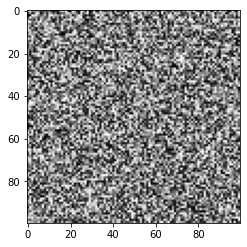

In [8]:
plt.ion()
plt.show()
for i in range(100):
    plt.imshow(np.random.rand(100,100))
    plt.draw()
    plt.pause(0.001)

In [66]:
plt.xlabel('Time')
plt.ylabel('Value')

Text(44.222222222222214, 0.5, 'Value')